# 감성 분석 모델 학습 및 추론

### 1. 데이터 로드

In [29]:
import pandas as pd

# 데이터셋 URL
train_url = "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt"
test_url = "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt"

# read_csv 함수를 사용하되, 구분자(sep)를 탭(\t)으로 지정
train_df = pd.read_csv(train_url, sep='\t')
test_df = pd.read_csv(test_url, sep='\t')

# 데이터 상위 5개 확인
display(train_df.head())
display(test_df.head())

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


### 2. 데이터 전처리

In [30]:
# 결측치 확인 및 처리
train_df = train_df.dropna(how='any')
test_df = test_df.dropna(how='any')

train_df.shape, test_df.shape

((149995, 3), (49997, 3))

In [31]:
# 한글이 아닌 문자 제거
import re

train_df['document'] = train_df['document'].apply(lambda x: re.sub(r'[^가-힣ㄱ-ㅎㅏ-ㅣ ]', '', x))
test_df['document'] = test_df['document'].apply(lambda x: re.sub(r'[^가-힣ㄱ-ㅎㅏ-ㅣ ]', '', x))
print(train_df.head())
print(test_df.head())

         id                                           document  label
0   9976970                                  아 더빙 진짜 짜증나네요 목소리      0
1   3819312                         흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                          교도소 이야기구먼 솔직히 재미는 없다평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...      1
        id                                   document  label
0  6270596                                        굳 ㅋ      1
1  9274899                                                 0
2  8544678           뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아      0
3  6825595                  지루하지는 않은데 완전 막장임 돈주고 보기에는      0
4  6723715  만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠      0


In [10]:
!pip install konlpy

In [ ]:

# 불용어 제거 및 토큰화
from konlpy.tag import Okt

okt = Okt()

# 불용어(Stopwords) 리스트 정의
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

# 토큰화 함수 정의
def tokenize(text):
    tokens = okt.morphs(text, stem=True)  # 형태소 단위로 토큰화
    return [word for word in tokens if word not in stopwords]   # 불용어 제거

# 토큰화 & 불용어 제거
X_train_tokenized = [tokenize(doc) for doc in train_df['document']]
X_test_tokenized = [tokenize(doc) for doc in test_df['document']]

In [12]:
X_train_tokenized

[['아', '더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정'],
 ['사이',
  '몬페',
  '그',
  '익살스럽다',
  '연기',
  '돋보이다',
  '영화',
  '스파이더맨',
  '에서',
  '늙다',
  '보이다',
  '하다',
  '커스틴',
  '던스트',
  '너무나도',
  '이쁘다',
  '보이다'],
 ['막',
  '걸음',
  '마',
  '떼다',
  '세',
  '부터',
  '초등학교',
  '학년',
  '생인',
  '살다',
  '영화',
  'ㅋㅋㅋ',
  '별',
  '반개',
  '아깝다',
  '움'],
 ['원작', '긴장감', '제대로', '살리다', '하다'],
 ['별',
  '반개',
  '아깝다',
  '욕',
  '나오다',
  '이응경',
  '길용우',
  '연',
  '기',
  '생활',
  '몇',
  '년',
  '인지',
  '정말',
  '발',
  '로',
  '해도',
  '그것',
  '보단',
  '낫다',
  '납치',
  '감금',
  '만',
  '반복',
  '반복',
  '드라마',
  '가족',
  '없다',
  '연기',
  '못',
  '하다',
  '사람',
  '만',
  '모',
  '엿'],
 ['액션', '없다', '재미', '있다', '몇', '안되다', '영화'],
 ['왜케',
  '평점',
  '낮다',
  '꽤',
  '볼',
  '만',
  '데',
  '헐리우드',
  '식',
  '화려하다',
  '너무',
  '길들이다',
  '있다'],
 ['걍', '인피니트', '짱', '이다', '진짜', '짱', '이다'],
 ['볼때',
  '마다'

In [13]:
from collections import Counter

word_counts = Counter(word for words in X_train_tokenized for word in words)
vocab_sorted = sorted(word_counts, key=word_counts.get, reverse=True)

# 단어에 정수 인덱스 부여
word_to_int = {word: i + 2 for i, word in enumerate(vocab_sorted)}
word_to_int['<PAD>'] = 0  # 패딩 토큰
word_to_int['<UNK>'] = 1   # 알 수 없는 단어 토큰 (Unknown)
VOCAB_SIZE = len(word_to_int)

In [14]:
word_to_int

{'영화': 2,
 '보다': 3,
 '하다': 4,
 '없다': 5,
 '이다': 6,
 '있다': 7,
 '좋다': 8,
 '너무': 9,
 '정말': 10,
 '되다': 11,
 '재밌다': 12,
 '적': 13,
 '만': 14,
 '같다': 15,
 '진짜': 16,
 '으로': 17,
 '로': 18,
 '아니다': 19,
 '않다': 20,
 '점': 21,
 '에서': 22,
 '만들다': 23,
 '나오다': 24,
 '연기': 25,
 '것': 26,
 '평점': 27,
 '내': 28,
 '최고': 29,
 '그': 30,
 '나': 31,
 '안': 32,
 '스토리': 33,
 '생각': 34,
 '못': 35,
 '왜': 36,
 '드라마': 37,
 '감동': 38,
 '사람': 39,
 '보고': 40,
 '이렇다': 41,
 '말': 42,
 '아깝다': 43,
 '더': 44,
 '배우': 45,
 '때': 46,
 'ㅋㅋ': 47,
 '아': 48,
 '감독': 49,
 '거': 50,
 '그냥': 51,
 '재미있다': 52,
 '요': 53,
 '재미': 54,
 '시간': 55,
 '내용': 56,
 '뭐': 57,
 '까지': 58,
 '중': 59,
 '주다': 60,
 '좀': 61,
 '자다': 62,
 '하고': 63,
 '지루하다': 64,
 '재미없다': 65,
 '쓰레기': 66,
 '수': 67,
 '모르다': 68,
 '가다': 69,
 '들다': 70,
 '그렇다': 71,
 '싶다': 72,
 '작품': 73,
 '사랑': 74,
 '알다': 75,
 '하나': 76,
 '다시': 77,
 '마지막': 78,
 '볼': 79,
 '잘': 80,
 '이건': 81,
 '정도': 82,
 '저': 83,
 '완전': 84,
 '오다': 85,
 'ㅋ': 86,
 'ㅠㅠ': 87,
 '많다': 88,
 '처음': 89,
 'ㅋㅋㅋ': 90,
 '장면': 91,
 '액션': 92,
 '주인공': 93,
 

In [15]:
# 정수 인코딩
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=15, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train_tokenized)

X_train_encoded = tokenizer.text_to_sequences(X_train_tokenized)
X_test_encoded = tokenizer.text_to_sequences(X_test_tokenized)

In [16]:
X_train_encoded

[[48, 451, 16, 255, 656],
 [930, 454, 40, 599, 2, 209, 1446, 25, 958, 672, 20],
 [383, 2441, 25012, 2312, 5668, 3, 217],
 [6489, 102, 8115, 213, 54, 5, 27, 3600],
 [1020,
  19413,
  30,
  9142,
  25,
  830,
  2,
  2576,
  22,
  1105,
  235,
  4,
  14240,
  19414,
  1073,
  249,
  235],
 [719,
  5669,
  977,
  1384,
  424,
  138,
  1689,
  1623,
  11557,
  220,
  2,
  90,
  121,
  1078,
  43,
  240],
 [208, 310, 320, 479, 4],
 [121,
  1078,
  43,
  328,
  24,
  9783,
  14241,
  294,
  118,
  1582,
  364,
  114,
  221,
  10,
  794,
  18,
  576,
  571,
  515,
  472,
  3114,
  8116,
  14,
  1385,
  1385,
  37,
  280,
  5,
  25,
  35,
  4,
  39,
  14,
  700,
  1069],
 [92, 5, 54, 7, 364, 95, 2],
 [1532, 27, 196, 532, 79, 14, 389, 1436, 357, 663, 9, 5670, 7],
 [374, 4684, 158, 6, 16, 158, 6],
 [739, 380, 1225, 199, 368, 2522, 281, 338, 11558, 601, 2491, 806, 5495, 6],
 [2239, 137, 858, 25013, 9784, 46, 1250, 275, 920, 768, 3681, 25, 982, 35, 4],
 [2466, 1226, 8, 471, 1182, 118, 725, 1470, 3,

In [17]:
# 패딩

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 50

X_train_padded = pad_sequences(X_train_encoded, padding='post', maxlen=max_len, truncating='post')
X_test_padded = pad_sequences(X_test_encoded, padding='post', maxlen=max_len, truncating='post')

X_train_padded

array([[   48,   451,    16, ...,     0,     0,     0],
       [  930,   454,    40, ...,     0,     0,     0],
       [  383,  2441, 25012, ...,     0,     0,     0],
       ...,
       [   57,    53,  1445, ...,     0,     0,     0],
       [ 1036,     2,  2262, ...,     0,     0,     0],
       [  191,     2,  1811, ...,     0,     0,     0]], dtype=int32)

### 3. 모델 정의 및 생성

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import pandas as pd
import matplotlib.pyplot as plt

# target label 생성
train_target = train_df['label'].values
test_target = test_df['label'].values

# torch Tensor 변환
train_data = torch.tensor(X_train_padded, dtype=torch.long)
train_label = torch.tensor(train_target, dtype=torch.float)
test_data = torch.tensor(X_test_padded, dtype=torch.long)
test_label = torch.tensor(test_target, dtype=torch.float)

# 모델 정의
class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(SentimentLSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        _, (hidden, _) = self.lstm(embedded)
        out = self.fc(hidden[-1])
        return self.sigmoid(out).squeeze()

In [20]:
# 모델 인스턴스 생성
def train_func(train_data, train_label, model):
    BATCH_SIZE = 65
    train_size = int(len(train_data) * 0.8)
    val_size = len(train_data) - train_size

    train_dataset, val_dataset = random_split(TensorDataset(train_data, train_label), [train_size, val_size])
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

    epochs = 50
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.005)

    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    # 조기종료 관련 변수 초기화
    early_stopping_patience = 7
    best_val_loss = float('inf')
    early_stop_counter = 0

    for epoch in range(epochs):
        # 학습 단계
        model.train()
        total_loss, correct, total = 0, 0, 0

        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)

            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            pred = (outputs > 0.5).float()
            correct += (pred == targets).sum().item()
            total += targets.size(0)

        train_loss = total_loss / len(train_loader)
        train_acc = correct / total
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        # 검증 단계
        model.eval()
        val_loss, val_correct, val_total = 0, 0, 0

        with torch.no_grad():
            for val_inputs, val_targets in val_loader:
                val_outputs = model(val_inputs)
                loss = criterion(val_outputs, val_targets)
                val_loss += loss.item()

                val_pred = (val_outputs > 0.5).float()
                val_correct += (val_pred == val_targets).sum().item()
                val_total += val_targets.size(0)

        val_loss = val_loss / len(val_loader)
        val_acc = val_correct / val_total
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        # 조기 종료 출력
        print(f'Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

        # 조기 종료
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            if early_stop_counter >= early_stopping_patience:
                print("Early Stopping 할게~~~~~!")
                break

    # 시각화
    history_df = pd.DataFrame({
        'train_loss': train_losses,
        'val_loss': val_losses,
        'train_acc': train_accs,
        'val_acc': val_accs
    })
    history_df.plot()
    plt.show()


VOCAB_SIZE = len(word_to_int) + 1
EMBEDDING_DIM = 64
HIDDEN_DIM = 128
OUTPUT_DIM = 1

lstm_model = SentimentLSTM(
    vocab_size=VOCAB_SIZE,
    embedding_dim=EMBEDDING_DIM,
    hidden_dim=HIDDEN_DIM,
    output_dim=OUTPUT_DIM
)

print(lstm_model)

SentimentLSTM(
  (embedding): Embedding(43751, 64)
  (lstm): LSTM(64, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


Epoch 1/50 | Train Loss: 0.6934, Train Acc: 0.5016, Val Loss: 0.6931, Val Acc: 0.5065
Epoch 2/50 | Train Loss: 0.6932, Train Acc: 0.5031, Val Loss: 0.6937, Val Acc: 0.4935
Epoch 3/50 | Train Loss: 0.6933, Train Acc: 0.4996, Val Loss: 0.6932, Val Acc: 0.4935
Epoch 4/50 | Train Loss: 0.6932, Train Acc: 0.4997, Val Loss: 0.6931, Val Acc: 0.5065
Epoch 5/50 | Train Loss: 0.6932, Train Acc: 0.5031, Val Loss: 0.6931, Val Acc: 0.5065
Epoch 6/50 | Train Loss: 0.6932, Train Acc: 0.5003, Val Loss: 0.6931, Val Acc: 0.5065
Epoch 7/50 | Train Loss: 0.6932, Train Acc: 0.4994, Val Loss: 0.6932, Val Acc: 0.5065
Epoch 8/50 | Train Loss: 0.6932, Train Acc: 0.5019, Val Loss: 0.6931, Val Acc: 0.5065
Epoch 9/50 | Train Loss: 0.6932, Train Acc: 0.5005, Val Loss: 0.6933, Val Acc: 0.4935
Epoch 10/50 | Train Loss: 0.6932, Train Acc: 0.5010, Val Loss: 0.6931, Val Acc: 0.5065
Epoch 11/50 | Train Loss: 0.6933, Train Acc: 0.4994, Val Loss: 0.6933, Val Acc: 0.4935
Epoch 12/50 | Train Loss: 0.6932, Train Acc: 0.4992,

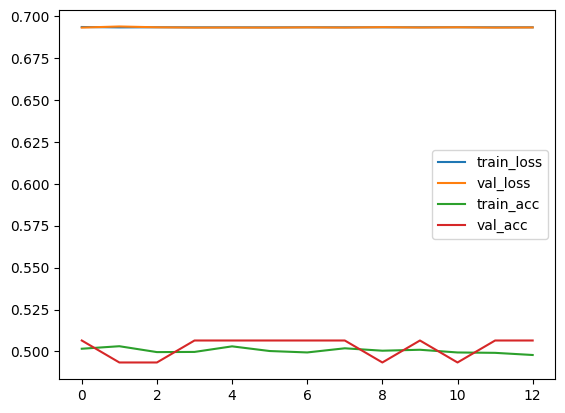

In [21]:
# 학습
train_func(train_data, train_label, lstm_model)

### 4. 모델 학습

In [22]:
# 평가용 데이터셋
# torch Tensor 변환
test_target = test_df['label'].values
padded_test = torch.tensor(X_test_padded, dtype=torch.long)
test_target = torch.tensor(test_target, dtype=torch.float)

test_dataset = TensorDataset(padded_test, test_target)
test_loader = DataLoader(test_dataset, batch_size=65)

# 평가 함수 정의
def evaluate_model(model, test_loader, criterion):
    model.eval()
    val_loss, val_correct, val_total = 0, 0, 0

    with torch.no_grad():
        for val_inputs, val_targets in test_loader:
            val_outputs = model(val_inputs)
            loss = criterion(val_outputs, val_targets)
            val_loss += loss.item()

            val_pred = (val_outputs > 0.5).float()
            val_correct += (val_pred == val_targets).sum().item()
            val_total += val_targets.size(0)

    val_loss = val_loss / len(test_loader)
    val_acc = val_correct / val_total
    return val_loss, val_acc

# 모델 평가
criterion = nn.BCELoss()
loss, accuracy = evaluate_model(lstm_model, test_loader, criterion)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Test Loss: 0.6931, Test Accuracy: 0.4973


### 5. 추론

In [23]:
import numpy as np

def predict_sentiment(sentence, model, word_to_int, tokenizer_func, max_len):
    model.eval()

    # 1. 새로운 문장 전처리
    cleaned_sentence = re.sub(r'[^가-힣ㄱ-ㅎㅏ-ㅣ ]', '', sentence)
    tokenized_sentence = tokenizer_func(cleaned_sentence)
    encoded_sentence = [word_to_int.get(word, 1) for word in tokenized_sentence]

    # 2. 패딩
    padded_sentence = np.zeros((1, max_len))
    pad_len = min(len(encoded_sentence), max_len)
    padded_sentence[0, :pad_len] = encoded_sentence[:pad_len]

    # 3. 텐서로 변환
    input_tensor = torch.tensor(padded_sentence, dtype=torch.long)

    # 4. 예측
    with torch.no_grad():
        output = model(input_tensor)
        prediction = output.item()


    # 5. 결과 해석
    label = 1 if prediction > 0.5 else 0
    return label, prediction

In [24]:
# 예측
while True:
    input_sentence = input('문장을 입력하세요 \n')

    if input_sentence != '종료':
        label, probs = predict_sentiment(input_sentence, lstm_model, word_to_int, tokenize, max_len)

        print(f'문장:', input_sentence)
        print(f"예측 : {'긍정' if label == 1 else '부정'} ('확률' = {probs:.4f})")

    else:
        break

문장을 입력하세요이 영화 진짜 재밌다
문장: 이 영화 진짜 재밌다
예측 : 부정 ('확률' = 0.4999)
문장을 입력하세요오늘 날씨가 너무 좋다
문장: 오늘 날씨가 너무 좋다
예측 : 부정 ('확률' = 0.4999)
문장을 입력하세요미쳤나
문장: 미쳤나
예측 : 부정 ('확률' = 0.4999)
문장을 입력하세요종료
